In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Cellphone.csv')
df.info()
df.describe().T
df.isnull().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

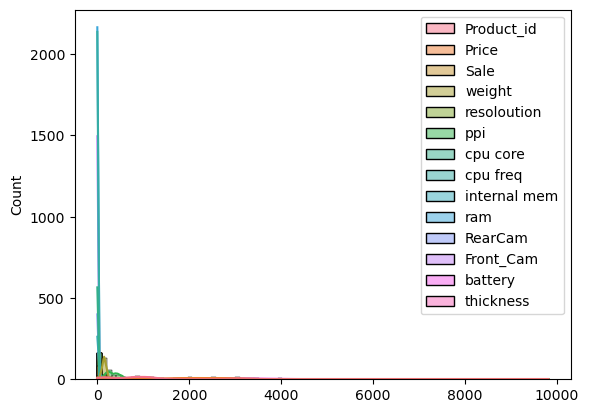

In [10]:
sns.histplot(df, kde=True)
plt.show()

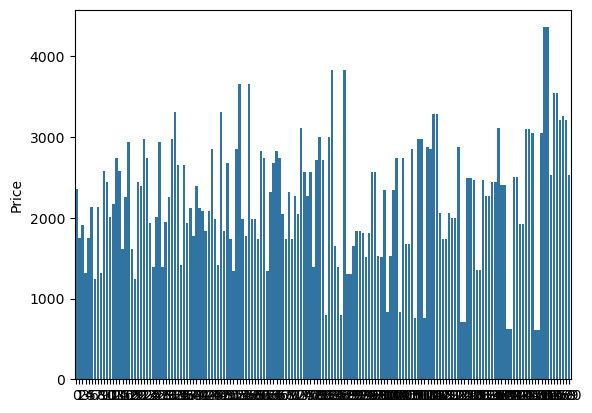

In [12]:
# Target Class
sns.barplot(df['Price'])
plt.show()

Skewness per numeric column:
Sale            4.269384
weight          3.981756
internal mem    2.389683
battery         2.092660
thickness       1.587680
resoloution     1.176110
Front_Cam       1.169750
ram             0.792698
ppi             0.602503
RearCam         0.106929
Price           0.052347
cpu core       -0.009077
Product_id     -0.216869
cpu freq       -0.512663
dtype: float64

Columns to transform (|skew| > 0.75): ['Sale', 'weight', 'resoloution', 'internal mem', 'ram', 'Front_Cam', 'battery', 'thickness']

Skewness after Yeo-Johnson:
resoloution     0.194987
Sale            0.086494
battery         0.034020
internal mem   -0.007992
ram            -0.021790
thickness      -0.049220
Front_Cam      -0.076752
weight         -0.165116
dtype: float64


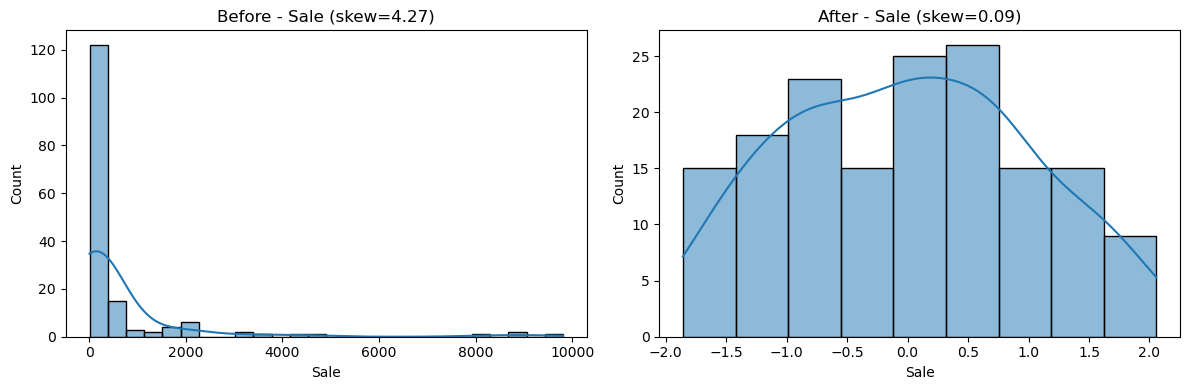

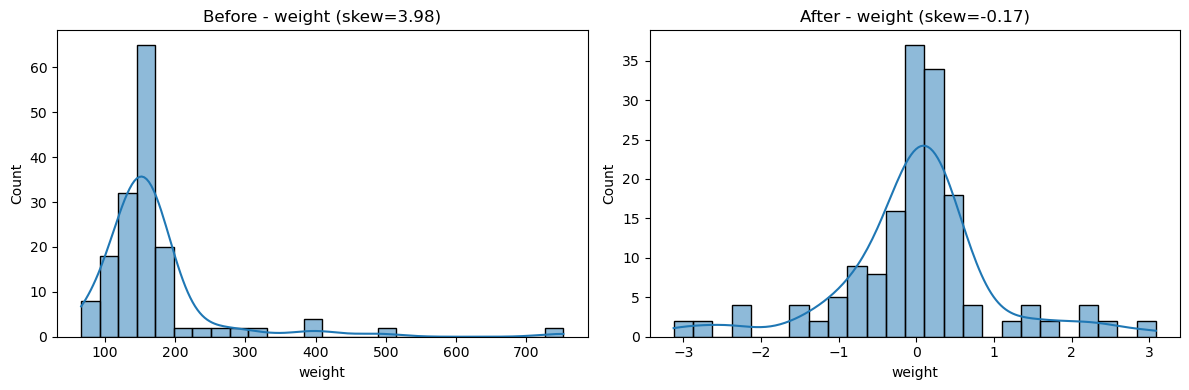

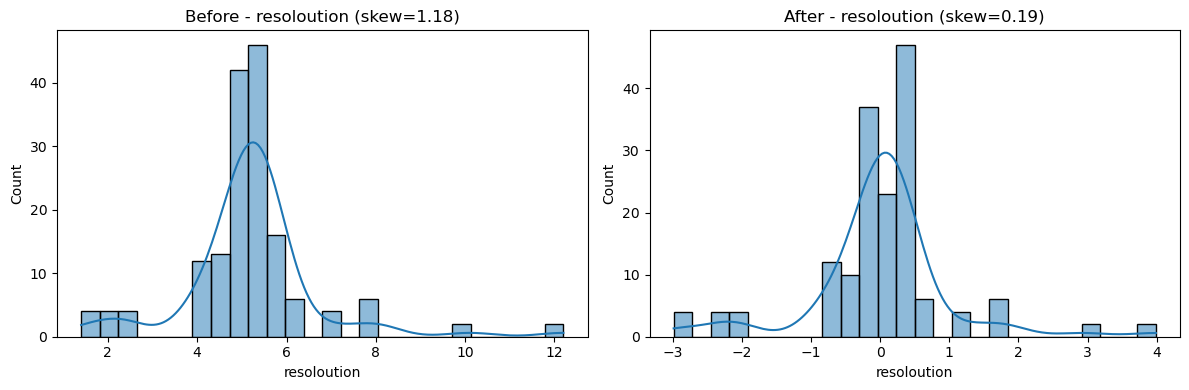

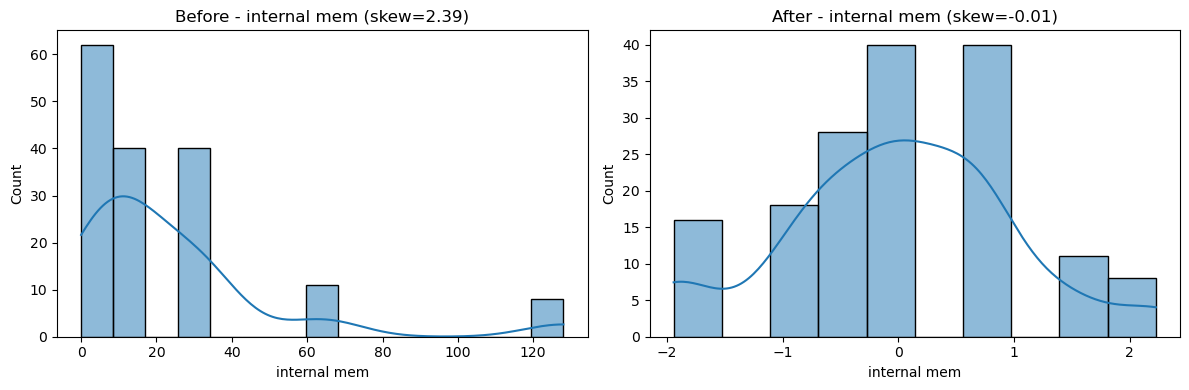

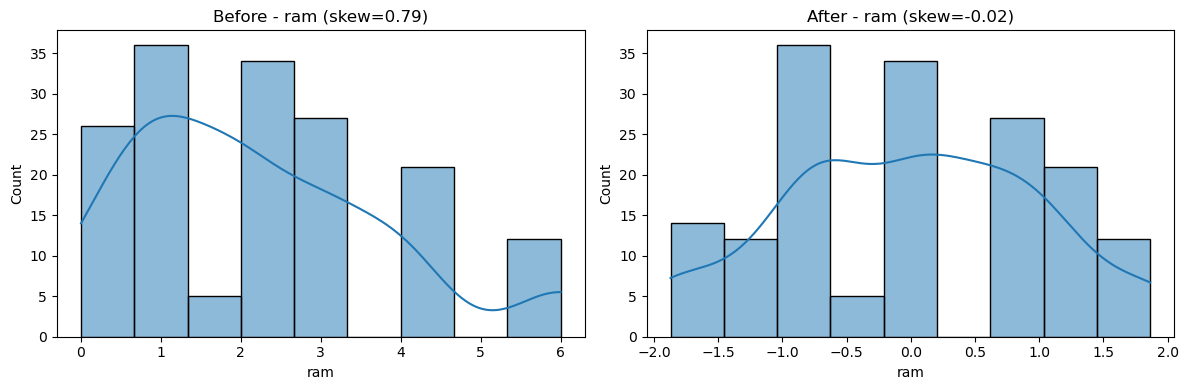

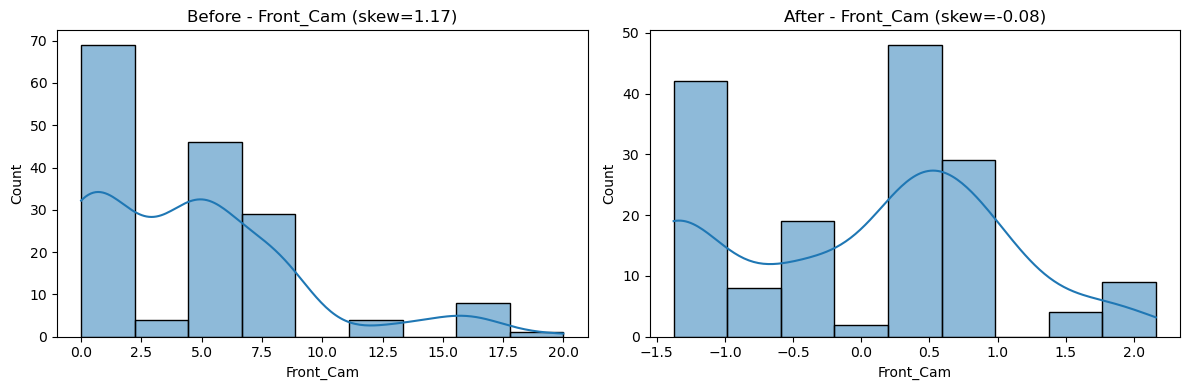

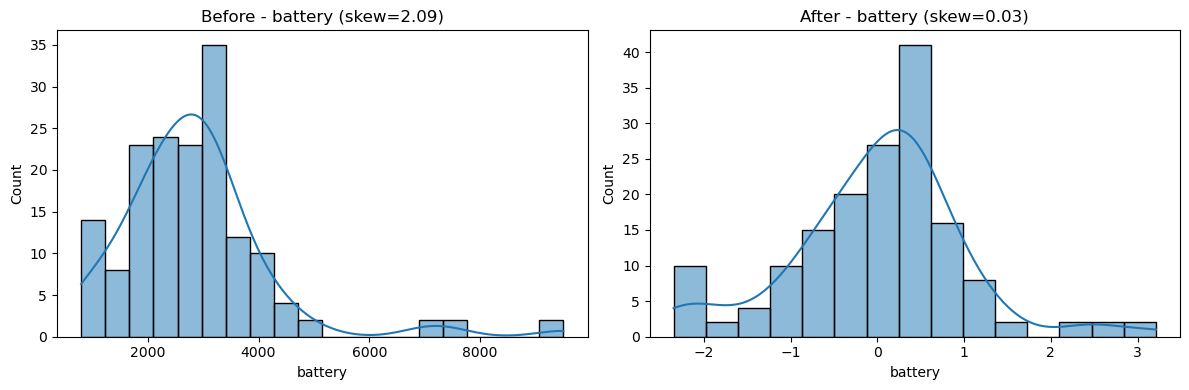

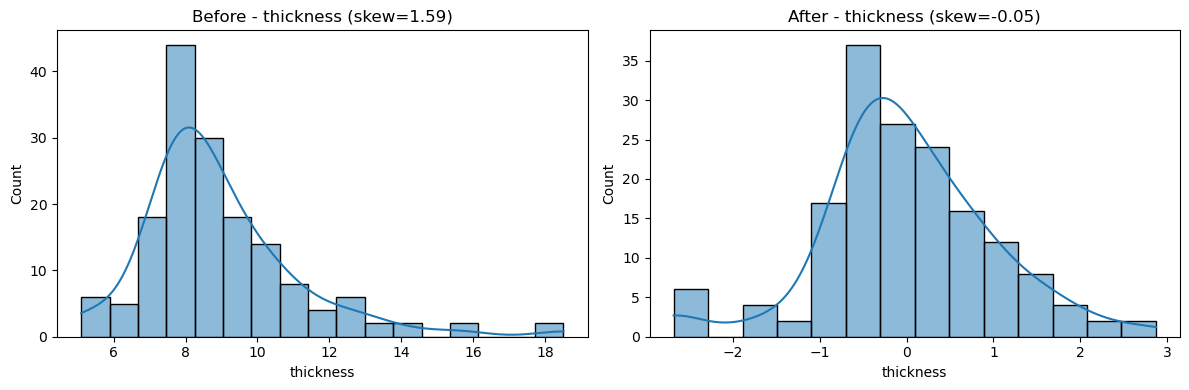

In [13]:
# Check the distributions/skewness in the variables and do the transformations if required.
from sklearn.preprocessing import PowerTransformer
# select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# compute skewness per numeric column
skewness = df[num_cols].skew()
print('Skewness per numeric column:')
print(skewness.sort_values(ascending=False))
# threshold for deciding to transform
threshold = 0.75
cols_to_transform = skewness[skewness.abs() > threshold].index.tolist()
print(f'\nColumns to transform (|skew| > {threshold}): {cols_to_transform}')
# apply Yeo-Johnson (works with zero and negative values) where appropriate
if cols_to_transform:
    try:
        pt = PowerTransformer(method='yeo-johnson')
        df_trans = df.copy()
        df_trans[cols_to_transform] = pt.fit_transform(df[cols_to_transform])
        new_skew = df_trans[cols_to_transform].skew()
        print('\nSkewness after Yeo-Johnson:')
        print(new_skew.sort_values(ascending=False))
        # Plot before/after for each transformed column
        import math
        for c in cols_to_transform:
            fig, axes = plt.subplots(1,2, figsize=(12,4))
            sns.histplot(df[c].dropna(), kde=True, ax=axes[0])
            axes[0].set_title(f'Before - {c} (skew={df[c].skew():.2f})')
            sns.histplot(df_trans[c].dropna(), kde=True, ax=axes[1])
            axes[1].set_title(f'After - {c} (skew={df_trans[c].skew():.2f})')
            plt.tight_layout()
            plt.show()
        # assign transformed dataframe back to df so downstream cells use transformed values
        df = df_trans
    except Exception as e:
        print('PowerTransformer failed, falling back to log1p for positive columns:', e)
        df_trans = df.copy()
        for c in cols_to_transform:
            if (df[c] > -1).all():
                df_trans[c] = np.log1p(df[c])
                fig, axes = plt.subplots(1,2, figsize=(12,4))
                sns.histplot(df[c].dropna(), kde=True, ax=axes[0])
                axes[0].set_title(f'Before - {c} (skew={df[c].skew():.2f})')
                sns.histplot(df_trans[c].dropna(), kde=True, ax=axes[1])
                axes[1].set_title(f'After log1p - {c} (skew={df_trans[c].skew():.2f})')
                plt.tight_layout()
                plt.show()
        df = df_trans
else:
    print('No columns exceed skewness threshold; no transform applied.')
